# GeoPandas

<font color="# 006fdd"> GeoPandas </font> es un proyecto open source diseñado para trabajar con datos geoespaciales en Python. 

Es una subclase de los pandas.DataFarme, tratándose de un tipo de estructura de datos geopandas.GeoDataFrame, que se caracteriza por contener geometrías y poder realizar operaciones especiales. 

Utiliza otras librerías como Pandas, MatPlotLib, Fiona y Descartes

## Instalación de la librería

Vamos a instalar las librerías necesarias

```bash
conda install pandas fiona shapely pyproj rtree geopandas
conda install contextily --channel conda-forge
```

In [4]:
# Y luego las cargamos

import pandas as pd, matplotlib.pyplot as plt, geopandas as gpd, contextily as ctx, numpy as np

## Explorando un archivo con información geográfica




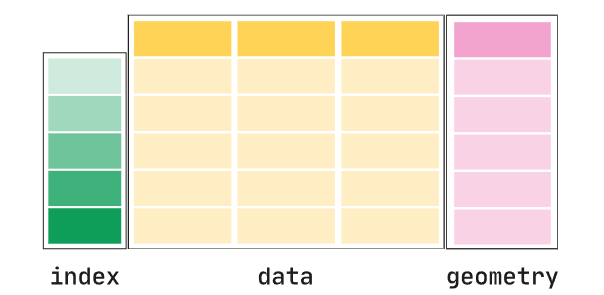

## Estructura de datos de GeoPandas

GeoPandas implementa dos estructuras de datos principales: <font color="# 006fdd"> GeoSeries </font> y <font color="# 006fdd"> GeoDataFrame </font>

## GeoSeries

<font color="# 006fdd"> Es un vector donde cada entrada es un conjunto de formas que corresponde a una observación </font>

Una entrada puede consistir de una sola forma (como un solo polígono) o múltiples formas que son destinado a ser considerado como una observación (como muchos polígonos).

GeoPandas tiene tres clases básicas de objetos geométricos (que en realidad son objetos bien formados):
* Puntos / puntos múltiples
* Líneas / Líneas múltiples
* Polígonos / Multi-Polígonos

No todas las entradas en una GeoSeries necesitan ser del mismo tipo geométrico

En términos de WKT 

Ver: https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry

<img src=https://github.com/MET4OP-UBA/MET4OP/raw/b0d43d76299156cc1b051933708091e9fe74c56a/clases/viejas/clase_07/extra/VirtWktGeomerticObjects.png>

<font color="# 006fdd"> Atributos </font>

| Atributo          | Descripción
|-------------------|---------------------------------------------------------------------------------------------------------|
|GeoSeries.area     | Returns a Series containing the area of each geometry in the GeoSeries expressed in the units of the CRS|
|GeoSeries.total_bounds | Returns a tuple containing minx, miny, maxx, maxy values for the bounds of the series as a whole    |
|GeoSeries.geom_type| Returns a Series of strings specifying the Geometry Type of each object                                 |
|GeoSeries.is_valid | Returns a Series of dtype('bool') with value True for geometries that are valid                         |

<font color="# 006fdd"> Métodos básicos </font>

| Atributo          | Descripción
|-------------------|---------------------------------------------------------------------------------------------------------|
|distance           | Returns a Series containing the distance to aligned other                                               |
|centroid           | Returns a GeoSeries of points representing the centroid of each geometry                                |
|representative_point| Returns a GeoSeries of (cheaply computed) points that are guaranteed to be within each geometry        |
|to_crs             | Returns a GeoSeries with all geometries transformed to a new coordinate reference system                |
|plot               | plot GeoSeries                                                                                          |

<font color="# 006fdd"> Pruebas de relación </font>

| Atributo          | Descripción
|-------------------|---------------------------------------------------------------------------------------------------------|
|geom_almost_equals | Returns a Series of dtype('bool') with value True if each aligned geometry is approximately equal to other|                                              
|contains           | Returns a Series of dtype('bool') with value True for each aligned geometry that contains other         |
|intersects         | Returns a Series of dtype('bool') with value True for each aligned geometry that intersects other       |


## GeoDataFrame

<font color="# 006fdd"> Es una estructura de datos tabular que contiene un GeoSeries </font> 

La propiedad más importante de un GeoDataFrame es que siempre tiene una
columna GeoSeries que tiene un estado especial. 

Esta GeoSeries se conoce como la <font color="# 006fdd"> geometría </font> del GeoDataFrame.

Se puede acceder a la columna con la *geometría*, sin importar su nombre, a través del atributo de geometry 

```
gdf.geometry
```

y se puede encontrar el nombre de la columna de geometry escribiendo 

```
gdf.geometry.name
```

Un GeoDataFrame también puede contener otras columnas con objetos geométricos (bien formados), pero solo una columna puede ser la geometría activa a la vez. Para cambiar qué columna es la columna de geometría activa, use el método 

```
set_geometry
```

**Nota**: Un GeoDataFrame realiza un seguimiento de la columna activa por
nombre, por lo que si cambia el nombre de la columna de geometría activa,
también debe restablecer la geometría:

```python
gdf = gdf.rename(columns = {'old_name': 'new_name'}).set_geometry( 'new_name' )
```



**Nota 2**: De manera predeterminada el comando 

```
read_file 
```

establece a la columna que se denomina *geometry* como la columna de la geometría activa.  Lo recomendable es siempre denominar a la columna con la geoemtría de esa forma. Caso contrario, se puede asignar manualmente la columna con el comando

```
set_geometry
```

El comando

```
gdf.geometry
```

siempre devolverá la columna de la geometría activa.

<font color="# 006fdd"> Atributos y métodos </font>


Todos los atributos y métodos descritos para un GeoSeries funcionan tambiénen un GeoDataFrame.

Sólo se aplican a la GeoSeries *geometría*.

Sin embargo, los GeoDataFrames también tienen algunos métodos adicionales para entrada y salida que se describen en la página Entrada y Salida y para la geocodificación con Geocoding. 

<font color="# 006fdd"> Indexación y selección de datos </font>

GeoPandas hereda los métodos pandas estándar para indexar/seleccionar datos. Esto incluye la indexación basada en etiquetas con *.loc* y la indexación basada en la posición de enteros con *.iloc*, que se aplican tanto a objetos GeoSeries como GeoDataFrame. Para obtener más información sobre indexación / selección, consulte la documentación de pandas. 


## Importar archivos geoespaciales

A modo de ejemplo, usaremos datos tomados del portal de datos abiertos de la Ciudad de Buenos Aires.

Trabajaremos con los <font color="# 006fdd"> radios censales </font> que son particiones de la superficie de la ciudad que contienen una cantidad similar de hogares. Fueron definidos por el INDEC para facilitar la labor durante la jornada del censo. La idea es asignar a cada censista un radio censal, estimando que puede recorrer todos los hogares del radio durante el día. 

Los radios censales son la unidad de análisis espacial por excelencia, debido a que combinan alta granularidad con abundante información asociada de acceso público, producida como resultado del Censo.

In [ ]:
censo = gpd.read_file(
    "dataset/censo2010/radios_censales/Codgeo_CABA_con_datos/cabaxrdatos.shp"
)
censo.head()
censo.dtypes

AREA          float64
PERIMETER     float64
PAIS0210_       int64
PAIS0210_I      int64
PROV           object
DEPTO          object
FRAC           object
RADIO          object
TIPO           object
LINK           object
VARONES       float64
MUJERES       float64
TOT_POB       float64
HOGARES       float64
VIV_PART      float64
VIV_PART_H    float64
geometry       object
dtype: object

## Fusionar datos

Hay dos formas de combinar conjuntos de datos en GeoPandas: <font color="# 006fdd"> uniones de atributos </font> y <font color="# 006fdd"> uniones espaciales </font>

### Por atributo

En una unión de atributo, un GeoSeries o GeoDataFrame se combina con una Series pandas regular o un DataFrame basado en una variable común. Esto es análogo a la fusión o unión normal en pandas.

Las uniones de atributos se logran utilizando el método de <font color="# 006fdd"> merge </font>. 

En general, se recomienda utilizar el método de *merge* llamado desde el conjunto de datos espaciales, si se desea conservar la columna con la geometría activa. 

Caso contrario, y a modo de ejemplo, si un DataFrame está en el argumento left y un GeoDataFrame está en la posición right, el resultado ya no será un GeoDataFrame. 

### Uniones espaciales

En una unión espacial, dos objetos de geometría se fusionan en función de su relación espacial entre sí. 

<font color="# 006fdd"> Sintaxis </font> 

```python
gpd.sjoin(gpd_DF_1, gpd_DF_1, how="XXX", op='YYY')
```

Las uniones espaciales (*sjoin.()*) tienen dos argumentos centrales: *op* y *how*

<font color="# 006fdd"> OP </font> 

El argumento *op* especifica si unir o no los atributos de un objeto a otro. Hay tres opciones de unión diferentes de la siguiente manera:

| OP                | Descripción
|-------------------|---------------------------------------------------------------------------------------------------------|
|intersects  | los atributos se unirán si el límite y el interior del objeto se cruzan de alguna manera con el límite y / o el interior del otro objeto|                                              
|within      | los atributos se unirán si el límite y el interior del objeto se cruzan solo con el interior del otro objeto (no su límite o exterior)|
|contains    | los atributos se unirán si el interior del objeto contiene el límite y el interior del otro objeto y sus límites no se tocan en absoluto|

Puede leer más sobre cada tipo de combinación en la documentación de Shapely .

<font color="# 006fdd"> How </font> 

El argumento de cómo especifica el tipo de unión que ocurrirá y qué geometría se retiene en el geodataframe resultante. Acepta las siguientes opciones:

| How               | Descripción
|-------------------|---------------------------------------------------------------------------------------------------------|
|left  | use el índice del primer (o left_df ) geodataframe que proporcione para sjoin ; retener solo la columna de geometría left_df|                                              
|right | usa index from second (o right_df ); retener solo la columna de geometría right_df                               |
|inner | usa la intersección de los valores de índice de ambos geodataframes; retener solo la columna de geometría left_df|

### Overlay

Esta operación opera en todo el DataFrame, y no en la cada geometría individualmente. Funciona creando nuevas geometrías basadas en los espacios en los que, las geometrías dadas, se superposicionan (o no).

Se especifica el tipo de overlay haciendo uso del *how*.

En efecto, sobre cada geometría que se encuentre en la izquierda (*left*), las siguientes operaciones se ejecutaran contra la geometría de la derecha (*right*) del GeoDataFrame:

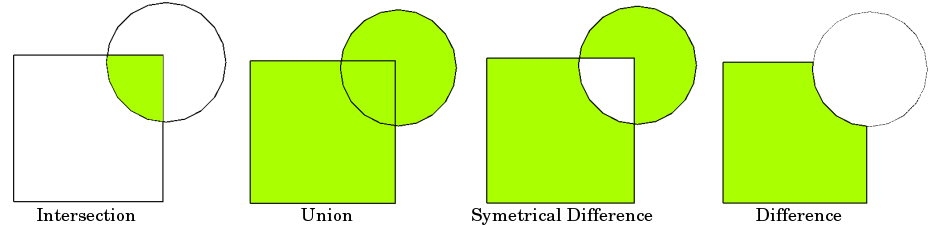

## Material extra

Repositorios de datos geoespaciales abiertos de Argentina:

* https://datos.gob.ar/
* https://catalogo.datos.gba.gob.ar/
* https://data.buenosaires.gob.ar/
* https://poblaciones.org/category/cartografias/